<a href="https://colab.research.google.com/github/gurmindersingh12/Exo70-analysis/blob/main/Exo70_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Setup in Google Colab

In [1]:
## First, ensure that you have the required packages installed.
## In Google Colab, you can install the necessary bioinformatics tools and libraries using the following code:

!apt-get install -y muscle

## This command installs MUSCLE (Multiple Sequence Comparison by Log-Expectation),
## a tool for creating multiple sequence alignments of nucleotide or protein sequences.
## In this analysis, MUSCLE aligns the Exo70 sequences, which is a crucial step before
## constructing a phylogenetic tree. The alignment ensures that the sequences are organized
## to highlight conserved regions, helping reveal evolutionary relationships.


## !: This symbol runs a shell command directly from the Jupyter notebook.
## It allows us to execute terminal commands, such as installing software, directly within the notebook environment.

## apt-get: This is a package management command in Debian-based Linux systems.
## It helps install, update, or remove software packages from repositories.


## install: Tells apt-get that we want to install a package.
## -y: This option automatically answers "yes" to any prompts during installation, so the installation proceeds without manual confirmation.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  muscle
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 244 kB of archives.
After this operation, 709 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 muscle amd64 1:3.8.1551-2build1 [244 kB]
Fetched 244 kB in 1s (365 kB/s)
Selecting previously unselected package muscle.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../muscle_1%3a3.8.1551-2build1_amd64.deb ...
Unpacking muscle (1:3.8.1551-2build1) ...
Setting up muscle (1:3.8.1551-2build1) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
## Google Colab doesn’t always have RAxML in its default repositories, so we need to either
## compile it from source or use a precompiled version if available. Here’s a workaround to
## install RAxML on Google Colab by downloading and compiling it directly:


## Download RAxML Source Code:
!wget https://github.com/stamatak/standard-RAxML/archive/refs/heads/master.zip -O raxml.zip
!unzip raxml.zip

## Compile RAxML:
%cd standard-RAxML-master
!make -f Makefile.gcc
%cd ..

## Move the Compiled RAxML to a Usable Location:
## This places the raxmlHPC executable in your path, so you can call it directly.

!cp standard-RAxML-master/raxmlHPC .




--2024-11-06 23:11:46--  https://github.com/stamatak/standard-RAxML/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/stamatak/standard-RAxML/zip/refs/heads/master [following]
--2024-11-06 23:11:46--  https://codeload.github.com/stamatak/standard-RAxML/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘raxml.zip’

raxml.zip               [       <=>          ]   9.75M  6.92MB/s    in 1.4s    

2024-11-06 23:11:48 (6.92 MB/s) - ‘raxml.zip’ saved [10226862]

Archive:  raxml.zip
8ee5879027ce766a89283ecc0da449ae2d64c540
   creating: standard-RAxML-master/
   creating: standard-RAxML-ma

In [1]:
!pip install biopython

## Biopython is a Python library for computational biology, providing tools to read,
## write, and manipulate biological data files (like FASTA and alignment files).
## In this analysis, we will use Biopython to load your Exo70 sequences, manage sequence data,
## and interact with the output files from MUSCLE and RAxML. It’s especially helpful for handling sequence data within Python.


!pip install ete3

## ETE3 (Environment for Tree Exploration) is a Python library for constructing, visualizing, and manipulating phylogenetic trees.
## After generating the tree with RAxML, we will use ETE3 to load and visualize the tree directly within Google Colab.
## This visualization will help interpret the phylogenetic relationships among the Exo70 sequences in a clear, graphical format.

# Step 2: Load and Organize Your Sequences

In [4]:
## Upload your Exo70 sequences file to Colab.
## Replace 'Exo70_sequences.fasta' with the path to your sequences file.

from Bio import SeqIO
from google.colab import files

# Upload your input FASTA files
uploaded = files.upload()

Saving seq.fa to seq.fa


In [5]:

# Load sequences
sequences = list(SeqIO.parse('seq.fa', 'fasta'))
print(f"Loaded {len(sequences)} sequences.")

Loaded 10 sequences.


# Step 3: Perform Multiple Sequence Alignment

In [6]:
## Use MUSCLE to perform sequence alignment. This creates a file Exo70_aligned.aln containing the alignment.

!muscle -in seq.fa -out Cox1_aligned.aln



MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

seq 10 seqs, lengths min 547, max 748, avg 679
00:00:00     16 MB(4%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     16 MB(4%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00     23 MB(6%)  Iter   1  100.00%  Align node
00:00:00     23 MB(6%)  Iter   1  100.00%  Root alignment
00:00:00     23 MB(6%)  Iter   2  100.00%  Root alignment
00:00:00     23 MB(6%)  Iter   3  100.00%  Refine biparts
00:00:01     23 MB(6%)  Iter   4  100.00%  Refine biparts
00:00:01     23 MB(6%)  Iter   5  100.00%  Refine biparts
00:00:01     23 MB(6%)  Iter   5  100.00%  Refine biparts


# Step 4: Phylogenetic Tree Construction with RAxML

In [11]:
## Using the aligned sequences, construct a phylogenetic tree with RAxML.
## Here’s the command to run RAxML, specifying the JTT model and 100 bootstraps for accuracy.

#!./raxmlHPC -f a -x 12345 -p 12345 -# 100 -m PROTGAMMAJTT -s Cox1_aligned.aln -n Cox1_tree

!./raxmlHPC -f a -x 12345 -p 12345 -# 1000 -m GTRGAMMA -s Cox1_aligned.aln -n Cox1000_tree


RAxML can't, parse the alignment file as phylip file 
it will now try to parse it as FASTA file



Using BFGS method to optimize GTR rate parameters, to disable this specify "--no-bfgs" 



This is RAxML version 8.2.12 released by Alexandros Stamatakis on May 2018.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Kassian Kobert    (HITS)
David Dao         (KIT and HITS)
Sarah Lutteropp   (KIT and HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
Charlie Taylor    (UF)


Alignment has 270 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 14.27%

RAxML rapid bootstrapping and subsequent ML search

Using 1 distinct models/data partitions with joint branch length optimization



Executing 1000 rapid bootstrap inferences and thereafter a thorough ML search 

All free model parameters will be estimated by RAxML
GAMMA model of ra

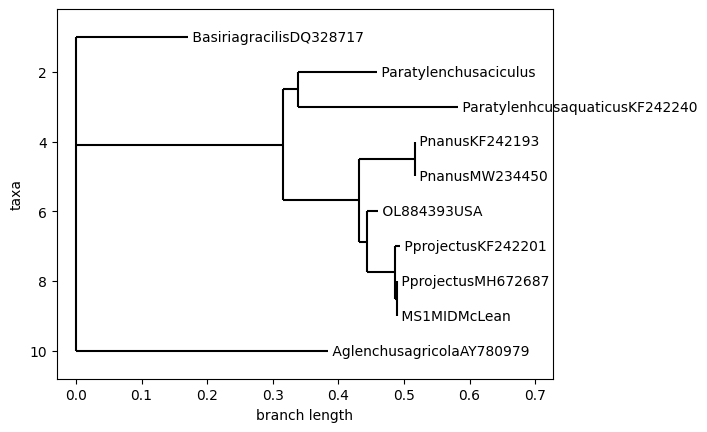

In [13]:
from Bio import Phylo
tree = Phylo.read("RAxML_bestTree.Cox1000_tree", "newick")
Phylo.draw(tree)


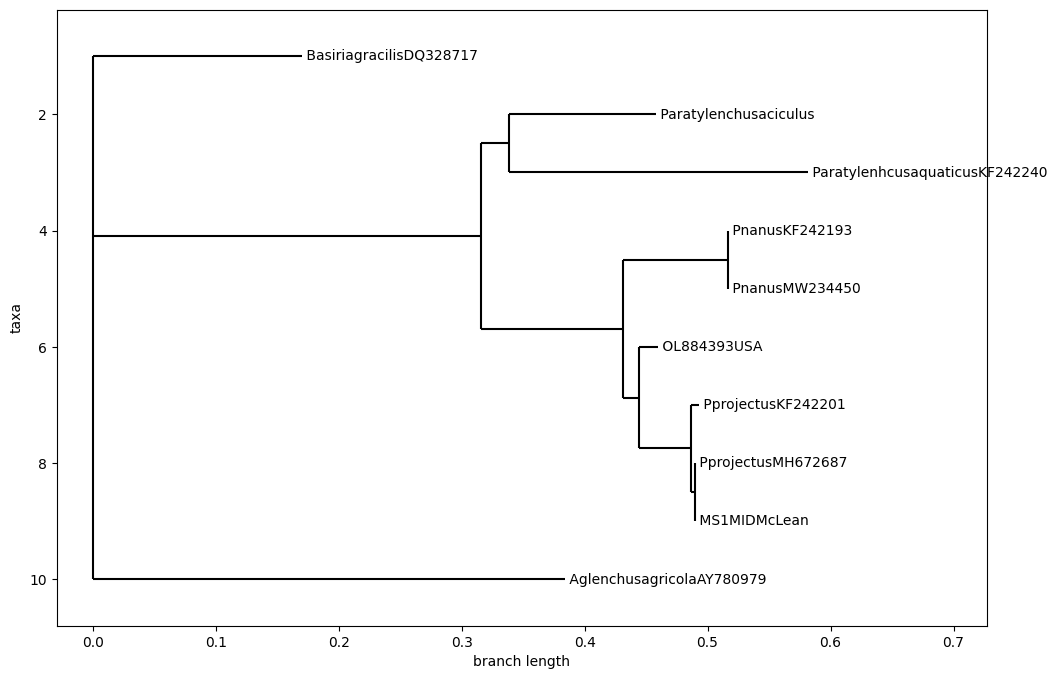

In [19]:
import matplotlib.pyplot as plt
from Bio import Phylo

# Read and draw the tree
tree = Phylo.read("RAxML_bestTree.Cox1000_tree", "newick")

# Create a figure with specific size to adjust scaling
fig = plt.figure(figsize=(12, 8))  # Adjust width and height as needed
ax = fig.add_subplot(1, 1, 1)

# Draw with customized settings
Phylo.draw(tree, axes=ax, show_confidence=False)

# Customize more visual aspects (optional)
ax.set_title("Phylogenetic Tree", fontsize=16)  # Title for the plot
plt.show()


In [22]:
## Step 8: Download Results

## You can download your results, including alignments, trees, or figures, directly from Google Colab.

from google.colab import files
#files.download('Exo70_aligned.aln')
#files.download('RAxML_bestTree.Cox1000_tree')
files.download('RAxML_bipartitions.Cox1000_tree')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>